## Take difference of monthly price

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
pca = pd.read_csv('../../data/log_returns_pca.csv')

In [7]:
price = pd.read_csv("../../data/agg_crude_price.csv")

In [9]:
pca.describe()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5
count,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,-0.002397,0.000244,-0.000098,0.000015,-0.000003,0.000004
std,0.069533,0.007889,0.003969,0.001989,0.001774,0.001670
min,-0.392744,-0.058195,-0.039314,-0.021543,-0.032206,-0.028653
25%,-0.040670,-0.003342,-0.001798,-0.000788,-0.000311,-0.000219
50%,-0.004049,0.000499,-0.000270,0.000015,0.000001,0.000010
75%,0.035878,0.004177,0.001378,0.000712,0.000321,0.000245
max,0.299889,0.041457,0.037401,0.018925,0.038383,0.023157


In [21]:
pca.columns

Index(['Date', 'pca_0', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5'], dtype='object')

In [15]:
price2 = price.copy()
price2['contago'] = np.where(price2['PX_LAST']-price2['PX_LAST_12'] < 0, 1,0)
price2['contago'].sum()

2329

In [34]:
price2["contago"].sum()/price2.shape[0]

0.45205745341614906

In [97]:
price_cols = [x for x in price2.columns if "LAST" in x]
price3 = price2[["Date"] + price_cols[:12]]
price3['Date'] = pd.to_datetime(price3['Date'])
price3.set_index('Date', inplace=True)
#price3 = price3.drop(columns=["Date"])
#print(f"Shape before dropping nulls, {df_subset.shape}")
price3 = price3.dropna()
#print(f"Shape after dropping nulls, {df_subset.shape}")

<ipython-input-97-ee272b3f8494>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price3['Date'] = pd.to_datetime(price3['Date'])


In [100]:
price3.shape

(5148, 12)

In [101]:
price3.head()

,PX_LAST,PX_LAST_2,PX_LAST_3,PX_LAST_4,PX_LAST_5,PX_LAST_6,PX_LAST_7,PX_LAST_8,PX_LAST_9,PX_LAST_10,PX_LAST_11,PX_LAST_12
Date,,,,,,,,,,,,
2023-04-12,87.34,86.73,85.99,85.26,84.58,83.93,83.35,82.67,82.08,81.60,81.01,80.52
2023-04-11,85.61,85.17,84.54,83.91,83.27,82.64,82.02,81.41,80.83,80.30,79.78,79.29
2023-04-10,84.18,83.79,83.21,82.61,82.00,81.40,80.81,80.23,79.67,79.17,78.67,78.21
2023-04-06,85.12,84.67,84.04,83.39,82.73,82.10,81.48,80.88,80.31,79.78,79.27,78.78
2023-04-05,84.99,84.62,84.04,83.42,82.77,82.15,81.55,80.97,80.41,79.89,79.39,78.91


In [116]:
cond = (price3['PX_LAST']<price3['PX_LAST_6']) & (price3['PX_LAST_6']<price3['PX_LAST_12'])
price3['contago'] = np.where(cond,1,0)

In [102]:
col_name = [f'{i}-{i+1} diff' for i in range(12)]

In [103]:
diff = price3.diff(axis=1).iloc[:, 1:].rename(columns=dict(zip(diff.columns, col_name)))
diff

,PX_LAST_2,PX_LAST_3,PX_LAST_4,PX_LAST_5,PX_LAST_6,PX_LAST_7,PX_LAST_8,PX_LAST_9,PX_LAST_10,PX_LAST_11,PX_LAST_12
Date,,,,,,,,,,,
2023-04-12,-0.61,-0.74,-0.73,-0.68,-0.65,-0.58,-0.68,-0.59,-0.48,-0.59,-0.49
2023-04-11,-0.44,-0.63,-0.63,-0.64,-0.63,-0.62,-0.61,-0.58,-0.53,-0.52,-0.49
2023-04-10,-0.39,-0.58,-0.60,-0.61,-0.60,-0.59,-0.58,-0.56,-0.50,-0.50,-0.46
2023-04-06,-0.45,-0.63,-0.65,-0.66,-0.63,-0.62,-0.60,-0.57,-0.53,-0.51,-0.49
2023-04-05,-0.37,-0.58,-0.62,-0.65,-0.62,-0.60,-0.58,-0.56,-0.52,-0.50,-0.48
...,...,...,...,...,...,...,...,...,...,...,...
2003-04-17,-0.07,-0.17,-0.16,-0.16,-0.16,-0.16,-0.18,-0.17,-0.17,-0.16,-0.12
2003-04-16,0.02,-0.10,-0.12,-0.12,-0.14,-0.15,-0.17,-0.15,-0.15,-0.14,-0.10
2003-04-15,-0.04,-0.04,-0.15,-0.14,-0.15,-0.15,-0.16,-0.16,-0.14,-0.13,-0.12


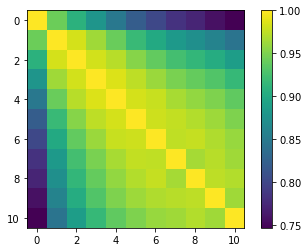

In [104]:
tick = diff.columns
plt.imshow(diff.corr())
#plt.xticks(ticks=[], labels=diff.columns)
plt.colorbar()

## PCA of price difference

In [56]:
from sklearn.decomposition import PCA

In [105]:
pca = PCA(n_components=5)
pca.fit(diff)
diff_pca = pca.transform(diff)

In [106]:
pca.explained_variance_ratio_

array([0.92207202, 0.05836912, 0.00939953, 0.00244183, 0.00161997])

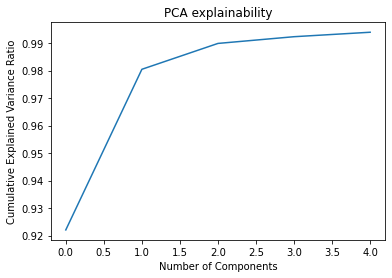

In [107]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title("PCA explainability")
plt.show()

In [135]:
df_pca = pd.DataFrame(diff_pca,columns=['pca_0', 'pca_1','pca_2','pca_3','pca_4'])
df_pca.set_index(pd.to_datetime(price3.index),inplace = True)

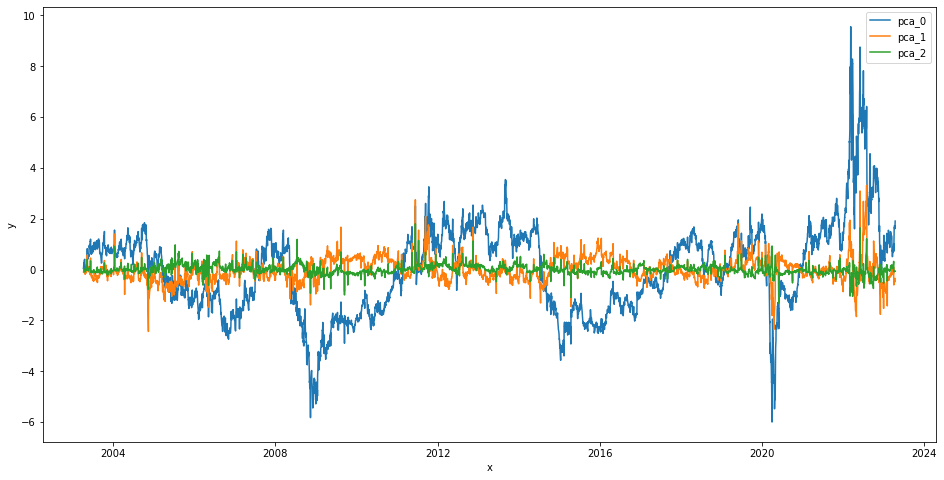

In [136]:
fig,ax=plt.subplots(figsize=(16,8))


x = df_pca.index
y1 = df_pca['pca_0']
y2 = df_pca['pca_1']
y3 = df_pca['pca_2']

# Plot the lines
plt.plot(x, y1, label='pca_0')
plt.plot(x, y2, label='pca_1')
plt.plot(x, y3, label='pca_2')

# Add legend and axis labels
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

In [157]:
diff['contago'] = price3['contago']
# diff.head()

In [141]:
idx = np.where(diff['contago'] == 1)[0]
idx

array([ 616,  617,  618, ..., 4600, 4602, 4604])

In [151]:
t = row[0]
pca_0 = row[1]["pca_0"]

In [155]:
diff.loc[t]["contago"]

0.0

Text(0.5, 1.0, 'PCA 2')

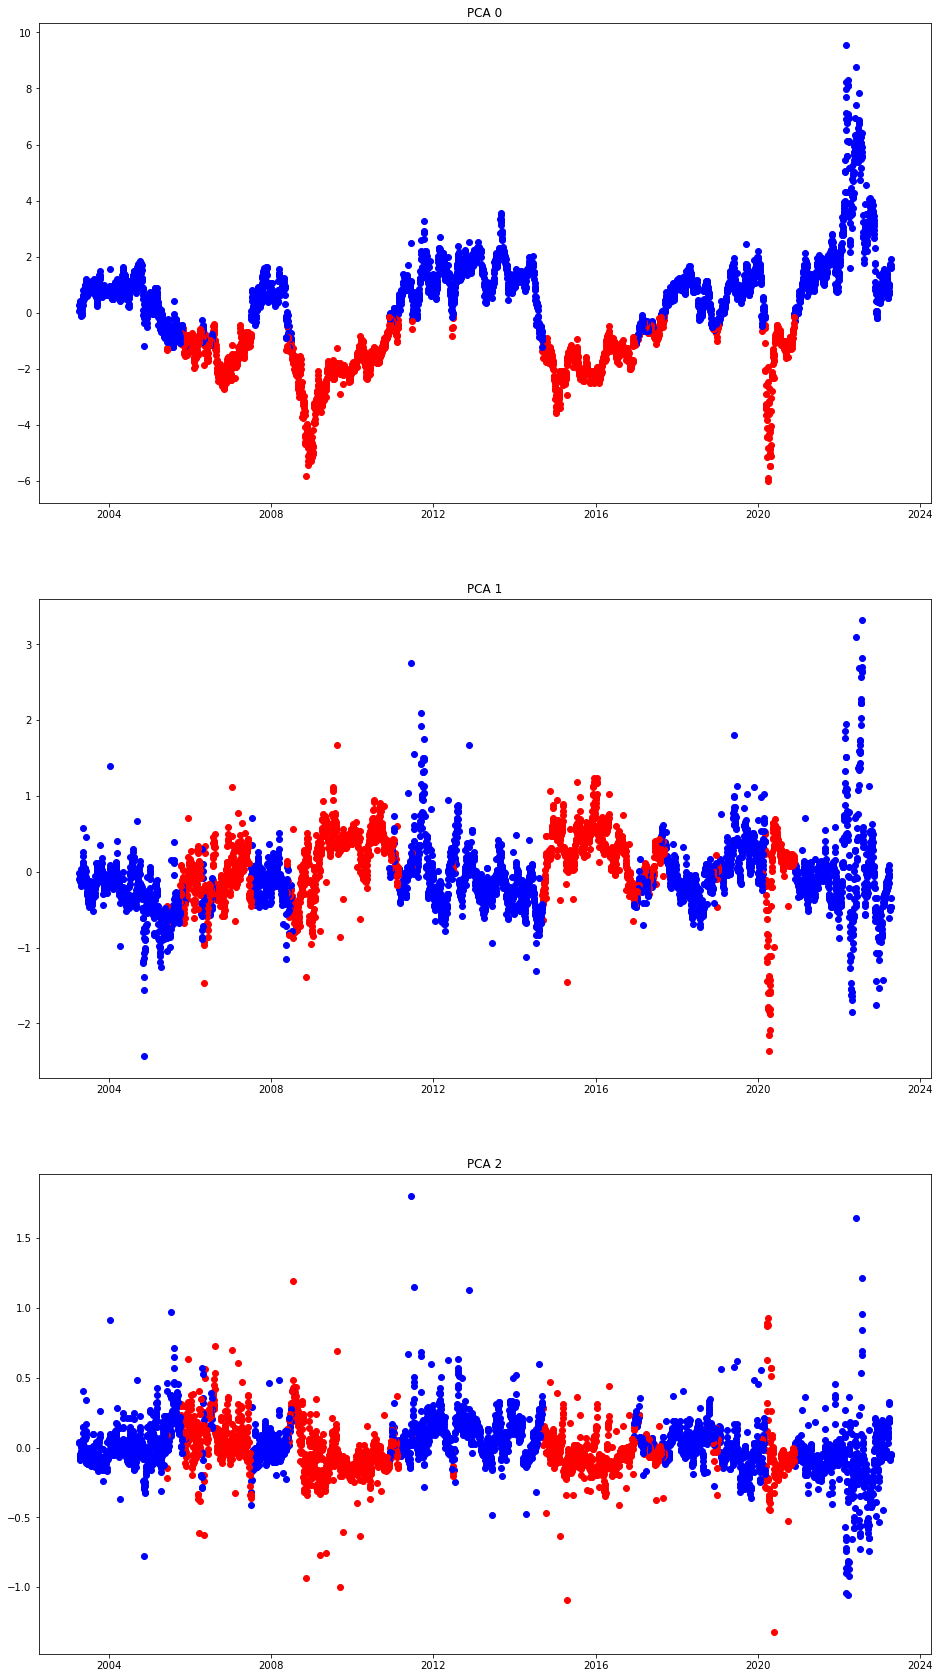

In [172]:
fig,ax=plt.subplots(3,1,figsize=(16,10*3))
for row in df_pca.iterrows():
    t = row[0]
    pca_0 = row[1]["pca_0"]
    pca_1 = row[1]["pca_1"]
    pca_2 = row[1]["pca_2"]
    color_i = "red" if diff.loc[t]["contago"] > 0 else "blue"
    ax[0].scatter(t,pca_0,color=color_i)
    ax[1].scatter(t,pca_1,color=color_i)
    ax[2].scatter(t,pca_2,color=color_i)
    
ax[0].set_title("PCA 0")
ax[1].set_title("PCA 1")
ax[2].set_title("PCA 2")

In [163]:
pca.components_.shape

(5, 11)

In [168]:
pca.components_[0,:]

array([-0.47141232, -0.41464253, -0.36526222, -0.32401865, -0.29045512,
       -0.2620737 , -0.23893724, -0.22040495, -0.203915  , -0.18900632,
       -0.17724716])

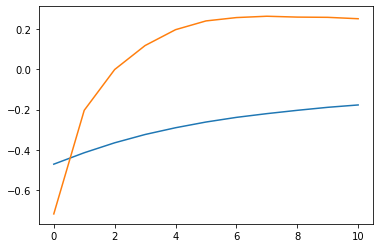

In [169]:
plt.plot(pca.components_[0,:])
plt.plot(pca.components_[1,:])
# plt.plot(pca.components_[3,:])

In [174]:
df_pca.head()

,pca_0,pca_1,pca_2,pca_3,pca_4
Date,,,,,
2023-04-12,1.909963,-0.351057,-0.056936,-0.028624,-0.040396
2023-04-11,1.717435,-0.471007,-0.047943,-0.000686,-0.015010
2023-04-10,1.609087,-0.467092,-0.055264,0.009463,-0.022080
2023-04-06,1.729451,-0.458372,-0.062140,0.008793,-0.004786
2023-04-05,1.635978,-0.502687,-0.074070,0.019104,-0.003345


In [175]:
df_pca['contago']= price3['contago']

In [176]:
df_pca.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,contago
Date,,,,,,
2023-04-12,1.909963,-0.351057,-0.056936,-0.028624,-0.040396,0
2023-04-11,1.717435,-0.471007,-0.047943,-0.000686,-0.015010,0
2023-04-10,1.609087,-0.467092,-0.055264,0.009463,-0.022080,0
2023-04-06,1.729451,-0.458372,-0.062140,0.008793,-0.004786,0
2023-04-05,1.635978,-0.502687,-0.074070,0.019104,-0.003345,0


In [177]:
df_pca.to_csv('../../data/pca_5c.csv')